## Logistic regression for stock price prediction


In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
data : pd.DataFrame = yf.download("AAPL",start="2020-01-01",end="2024-12-31")
print(data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_25496\3346231027.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data : pd.DataFrame = yf.download("AAPL",start="2020-01-01",end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.538521   72.598899   71.292311   71.545897  135480400
2020-01-03   71.833305   72.594071   71.608700   71.765682  146322800
2020-01-06   72.405670   72.444313   70.703005   70.954181  118387200
2020-01-07   72.065155   72.671348   71.845377   72.415345  108872000
2020-01-08   73.224419   73.526310   71.768094   71.768094  132079200
...                ...         ...         ...         ...        ...
2024-12-23  254.367020  254.745665  252.553450  253.868788   40858800
2024-12-24  257.286652  257.296596  254.386927  254.586231   23234700
2024-12-26  258.103729  259.179926  256.718662  257.276679   27237100
2024-12-27  254.685867  257.784882  252.164818  256.917934   42355300
2024-12-30  251.307861  252.603266  249.862994  251.337754   35557500

[1257 rows x 5 colu

In [14]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.538521,72.598899,71.292311,71.545897,135480400
2020-01-03,71.833305,72.594071,71.608700,71.765682,146322800
2020-01-06,72.405670,72.444313,70.703005,70.954181,118387200
2020-01-07,72.065155,72.671348,71.845377,72.415345,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


In [15]:
data.shape

(1257, 5)

In [16]:
data['price_change']=data['Close'].diff()
data['target']=(data['price_change'].shift(-1)>0).astype(int)
data['MA5']=data['Close'].rolling(window=5).mean()


In [17]:
data['MA10']=data['Close'].rolling(window=10).mean()
data['volume_change']=data['Volume'].pct_change()
data.dropna(inplace=True)


In [18]:
features = ['MA5','MA10','volume_change']
X=data[features]
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [22]:
print("Accuracy : ", accuracy_score(y_test,y_pred))
print(f"Confustion matrix : \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification report : \n{classification_report(y_test,y_pred)}")

Accuracy :  0.532
Confustion matrix : 
[[  5 112]
 [  5 128]]
Classification report : 
              precision    recall  f1-score   support

           0       0.50      0.04      0.08       117
           1       0.53      0.96      0.69       133

    accuracy                           0.53       250
   macro avg       0.52      0.50      0.38       250
weighted avg       0.52      0.53      0.40       250



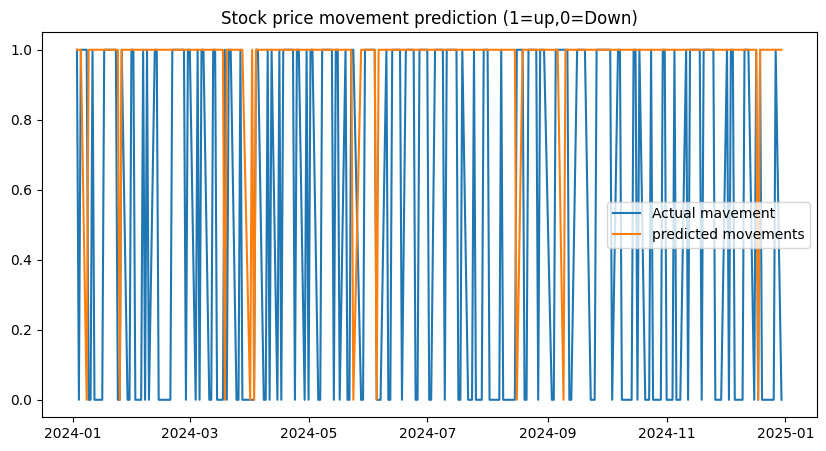

In [21]:
plt.figure(figsize=(10,5))
plt.plot(data.index[-len(y_test):],y_test.values,label="Actual mavement")
plt.plot(data.index[-len(y_test):],y_pred,label="predicted movements")
plt.legend()
plt.title("Stock price movement prediction (1=up,0=Down)")
plt.show()